# The Maxwell-Boltzmann distribution
Regardless of the initial state of the discs, over time the speed distribution will tend to a Maxwell-Botlzmann distribution. In two dimensions, this is,
$$
P(v) \, \mathrm{d} v
=
\frac{mv}{k_B T}
\mathrm{exp}\left({- \frac{mv^2}{2 k_B T}} \right) \mathrm{d} v
$$
In this notebook, we run a simulation of 10,000 discs with identical masses, radii and initial speeds. We compute the speed distribution at a later point in time and show it is consistent with the above Maxwell-Botzmann.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import billiards as bl

In [12]:
# Setup the simulation
L = 400.0  # Simulation width
bottom_left = np.array([-L/2, -L/2])
top_right = np.array([L/2, L/2])

sim = bl.PySim(bottom_left, top_right, 49, 49)

# Number, speed, masses, radii of discs
N_discs = 10_000
v = 1.0
m = 1.0
R = 1.0

sim.add_random_discs(bottom_left, top_right, N_discs, m, R, v=v, pos_allocation='grid')

sim.setup()

In [13]:
# Run the simulation for a bit, only interested in the final state, so no need to record events
sim.advance(100_000, 10000.0, False)

In [14]:
# Compute the speeds of all particles
speeds = np.linalg.norm(sim.current_state['v'], axis=1)

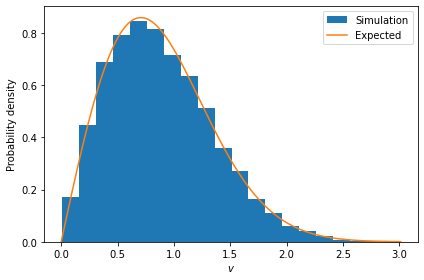

In [15]:
# Plot a histogram of the simulation's distribution
bin_vals, bins, _ = plt.hist(speeds, bins=20, density=True, label="Simulation")

# Compute & plot the expected distribution
# Note as it's a 2d gas, it's energy is k_B*T, not (3/2)*k_B*T
kB_T = m*v**2/2

speeds_arr = np.linspace(0.0, bins[-1], 1000)
exp_dist = m*speeds_arr/kB_T * np.exp(-(m/(2*kB_T)) * speeds_arr**2)

plt.plot(speeds_arr, exp_dist, label="Expected")
                                      

plt.xlabel("$v$")
plt.ylabel("Probability density")

plt.legend()

plt.tight_layout()
plt.show()

Now let's look at the cumulative distribution function.

In [62]:
def compute_cdf(x, data):
    """Computes the empirical cdf at x using the given data"""
    return np.sum(data <= x[:, np.newaxis], axis=1) / data.shape[0]

In [67]:
# simulation CDF
v_vals = np.linspace(0.1, bins[-1], 100)
sim_cdf = compute_cdf(v_vals, speeds)

# predicted CDF
pred_cdf = 1.0 - np.exp(-m*v_vals**2/(2*kB_T))

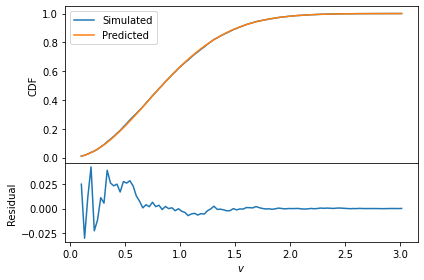

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1], 'hspace': 0}, sharex=True)

ax1.plot(v_vals, sim_cdf, label="Simulated")
ax1.plot(v_vals, pred_cdf, label="Predicted")

ax2.plot(v_vals, (sim_cdf - pred_cdf) / pred_cdf)

ax1.set_ylabel("CDF")
ax2.set_xlabel("$v$")
ax2.set_ylabel("Residual")

ax1.legend()

plt.tight_layout()
plt.show()